In [1]:
!pip install opencv-python-headless numpy matplotlib rembg torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [3]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.6 MB/s eta 0:00:00


In [4]:
import cv2                               # OpenCV for image processing[1]
import numpy as np                       # Array operations[1]
import matplotlib.pyplot as plt          # Visualization[1]
from rembg import remove                 # Background removal[2]
from google.colab import files           # File upload widget[1]
import torch                             # PyTorch for detection model[1]
import torchvision                       # Pretrained detection models[1]
from PIL import Image                    # Image I/O[1]


In [5]:
uploaded = files.upload()  # Upload both image1 and image2
for fn in uploaded.keys():
    if 'image1' in fn: image1_path = fn
    if 'image2' in fn: image2_path = fn


Saving VK.jpg to VK.jpg


In [6]:
# Read image1 (person) and image2 (new background)
image1_path = "VK.jpg"
image2_path = "image2.jpeg"
img1 = cv2.imread(image1_path)
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert to RGB[1]
img2 = cv2.imread(image2_path)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Convert to RGB[1]


In [7]:
# Use rembg to remove background from image1
with Image.open(image1_path) as im:
    result_pil = remove(im)                 # Remove background[2]
result_np = np.array(result_pil)             # Convert to NumPy array[1]
# Separate alpha channel mask and person image
person_rgb = result_np[..., :3]
alpha_mask = result_np[..., 3] / 255.0       # Normalize alpha[2]


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 115GB/s]


In [8]:
# Match image2 size to image1
h, w = person_rgb.shape[:2]
bg_resized = cv2.resize(img2_rgb, (w, h), interpolation=cv2.INTER_AREA)


In [9]:
# Prepare composite image
composite = np.zeros_like(person_rgb, dtype=np.uint8)
for c in range(3):
    composite[..., c] = (
        person_rgb[..., c] * alpha_mask
        + bg_resized[..., c] * (1 - alpha_mask)
    ).astype(np.uint8)


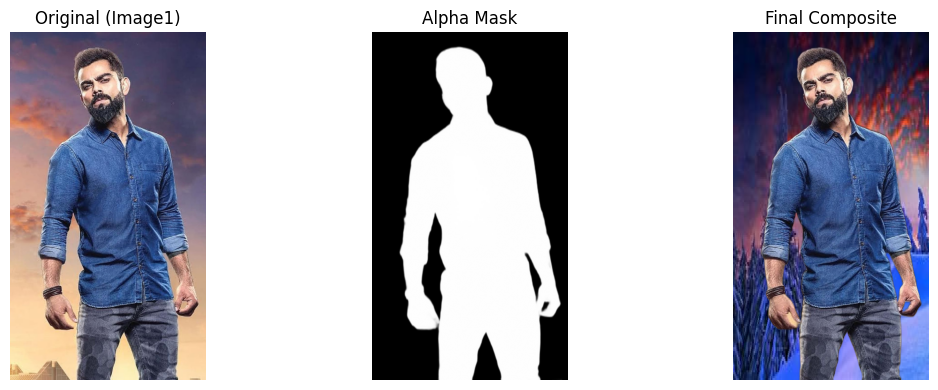

In [10]:
# Display original, mask, and final composite
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1_rgb)
plt.title('Original (Image1)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(alpha_mask, cmap='gray')
plt.title('Alpha Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(composite)
plt.title('Final Composite')
plt.axis('off')

plt.tight_layout()
plt.show()
